<a href="https://colab.research.google.com/github/furkancimen/COT5600/blob/master/hw2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

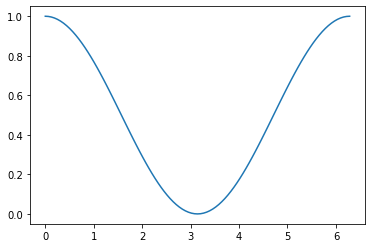

In [0]:
import numpy as np
from numpy import cos, sin, exp, sqrt, pi
import scipy.linalg as LA
import matplotlib.pyplot as plt


np.set_printoptions(precision=3, suppress=True)


# Defien identity operator
Id = np.eye(2)

# Define our zero qubit
Zero = np.array([[1.0],
                 [0.0]])
# Define out one qubit
One = np.array([[0.0],
                [1.0]])

# P_0 = |0><0|
P_0 = np.dot(Zero, Zero.T)

# P_1 = |1><1|
P_1 = np.dot(One, One.T)

# Define Hadamard opeartion
Hadamard = 1./sqrt(2) * np.array([[1, 1],
                                  [1, -1]])
HadamardZeroOnTwo = np.kron(Hadamard, Id)

# Define rotation matrix
def rotation_matrix(theta):
  return np.array([[cos(theta), -sin(theta)],
                   [sin(theta), cos(theta)]])
  
# States should be unit amplitude
def normalize_state(state):
  return state/LA.norm(state)

# Unitary operation controlled by 0 and applied to 1 for theta_delta
# Define theta steps
delta_theta = 2*pi/100
CUnitary01 = np.kron(P_0, Id) + np.kron(P_1, rotation_matrix(delta_theta))


# Form our 2 qubit with |psi> = 0
ZeroZero = np.kron(Zero, Zero)

# Apply hadamard to the first qubit
NewState = np.dot(HadamardZeroOnTwo, ZeroZero)


LastState_array = [np.dot(HadamardZeroOnTwo, NewState)]
AfterUnitaryState = np.dot(CUnitary01, NewState)
for index in range(100):
  TheLastHadamardState = np.dot(HadamardZeroOnTwo, AfterUnitaryState)
  LastState_array.append(TheLastHadamardState)
  AfterUnitaryState = np.dot(CUnitary01, AfterUnitaryState)

#Find probability of measuring 0 on qubit 0
Prob0_array = []
for state in LastState_array:
  Prob0= np.trace(np.dot(np.dot(state, state.T), NKron(P_0, Id)))
  Prob0_array.append(Prob0)



thetaVal_array = np.array(list(range(101))) * 2 * pi/100
plt.plot(thetaVal_array, Prob0_array)


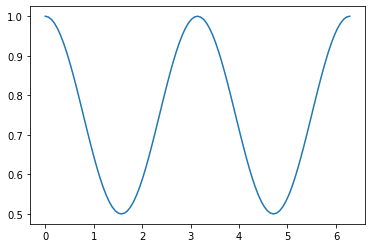

In [0]:
import numpy as np
from numpy import cos, sin, exp, sqrt, pi
import scipy.linalg as LA
import matplotlib.pyplot as plt


np.set_printoptions(precision=3, suppress=True)

# States should be unit amplitude
def normalize_state(state):
  return state/LA.norm(state)

def NKron(*args):
  """Calculate a Kronecker product over a variable number of inputs"""
  result = np.array([[1.0]])
  for op in args:
    result = np.kron(result, op)
  return result

def rotation_matrix(theta):
  return np.array([[cos(theta), -sin(theta)],
                   [sin(theta), cos(theta)]])

# Defien identity operator
Id = np.eye(2)

# Define our zero qubit
Zero = np.array([[1.0],
                 [0.0]])
# Define out one qubit
One = np.array([[0.0],
                [1.0]])

# P_0 = |0><0|
P_0 = np.dot(Zero, Zero.T)

# P_1 = |1><1|
P_1 = np.dot(One, One.T)

# Define Hadamard opeartion
Hadamard = 1./sqrt(2) * np.array([[1, 1],
                                  [1, -1]])
HadamardZeroOnThree = NKron(Hadamard, Id, Id)

# Define SWAP operator
Swap = np.array([[1, 0, 0, 0],
                 [0, 0, 1, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1]])
ControlledSwap = NKron(P_0, Id, Id) + np.kron(P_1, Swap)

# Unitary operation on 0 and applied to 2 for theta_delta
# Define theta steps
delta_theta = 2*pi/100
UnitaryThreeOnThree = NKron(Id, Id, rotation_matrix(delta_theta))

q1 = Zero
q2 = Zero

NewState = np.dot(Hadamard, Zero)
ThreeQubitState = NKron(NewState, q1, q2)

thetaVal_array = np.array(list(range(101))) * 2 * pi/100  
LastState_array = []

for index in thetaVal_array:
  SwapOperation = np.dot(ControlledSwap, ThreeQubitState)
  TheLastHadamardState = np.dot(HadamardZeroOnThree, SwapOperation)
  LastState_array.append(TheLastHadamardState)
  ThreeQubitState = np.dot(UnitaryThreeOnThree, ThreeQubitState)

#Find probability of measuring 0 on qubit 0
Prob0_array = []
for state in LastState_array:
  Prob0= np.trace(np.dot(np.dot(state, state.T), NKron(P_0, Id, Id)))
  Prob0_array.append(Prob0)

plt.plot(thetaVal_array, Prob0_array)


     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 2.9MB 2.7MB/s 
     |████████████████████████████████| 23.1MB 1.9MB/s 
     |████████████████████████████████| 143kB 41.4MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 1.8MB 44.0MB/s 
     |████████████████████████████████| 5.6MB 37.0MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 296kB 47.3MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 573kB 47.4MB/s 
     |████████████████████████████████| 24.3MB 1.4MB/s 
     |████████████████████████████████| 2.7MB 35.1MB/s 


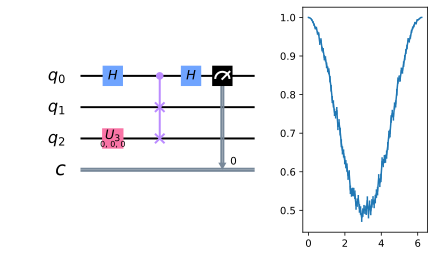

In [0]:
import numpy as np
from numpy import pi
!pip install -q folium==0.2.1
!pip install -q qiskit==0.16
#!pip install -q pygments
#!pip install -q qiskit-terra[visualization]
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

head = QuantumCircuit(3)
head.h(0)
middle = QuantumCircuit(3)
middle.u3(0, 0, 0, 2)
tail = QuantumCircuit(3,1)
tail.cswap(0, 1, 2)
tail.h(0)
tail.measure(0,0)
circuits = [head + middle + tail]
exp_vector = range(101)
exp_theta = [0]
theta = 0.0
delta_theta = 2*pi/len(exp_vector)
for exp_index in exp_vector:
    exp_theta.append(theta)
    middle.u3(delta_theta, 0, 0, 2)
    circuits.append(head + middle + tail)
    theta = theta + delta_theta
#circuits[0].draw('mpl')

# Let's calculate the results
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(circuits, backend=backend, shots=shots).result()
#answer = results.get_counts()

exp_data = []
exp_error = []
for index in range(len(circuits)):
  data = results.get_counts(circuits[index])
  try:
      p0 = data['0']/shots
  except KeyError:
      p0 = 0
  exp_data.append(p0)
  exp_error.append(np.sqrt(p0*(1-p0)/shots))

# Let's plot our circuit and result
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.tight_layout()
plt.errorbar(exp_theta, exp_data, exp_error)
circuits[0].draw('mpl', ax=axs[0])
